<a href="https://colab.research.google.com/github/ParnaviSen03/Sentiment_Analysis_Twitter_Reddit/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scarpping Reddit data

In [ ]:
pip install praw


     -------------------------------------- 189.3/189.3 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import praw
from prawcore.exceptions import NotFound
import pandas as pd
from tqdm import tqdm

arr=[]
reddit = praw.Reddit(
    client_id='eLHIfVLEUxnTQlLlGt29_Q',
    client_secret='xalSQxSsLr5oxApVsrobL5dyasmCOw',
    user_agent='python:my_reddit_sentiment_app:v1.0.0 (by u/on_a_no_buy)'
)

try:
    subreddit = reddit.subreddit('sneakers')
    for post in tqdm(subreddit.hot(limit=1000)):
        #print(post.title)
        #print(post.selftext)
        if len(post.comments) > 0:
            comment=post.comments[0].body
        else:
            comment=" "
        arr.append([post.title,post.selftext,post.upvote_ratio,post.created_utc,post.score,comment])
except NotFound:
    print("The requested resource was not found. Please check the subreddit name or resource ID.")
df_sneakers = pd.DataFrame(arr, columns=['Title', 'Body','Upvote_ratio','Timestamp','Upvote_num','comments'])


951it [04:41,  3.38it/s]


In [ ]:
#Store the subreddit as csv
df_sneakers.to_csv('sneakers.csv', index=False)


In [1]:
#Merge all the datasets together
# Path to the folder containing the CSV files
folder_path = 'Dataframe_new'

# List to store the DataFrames
dataframes = []

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV into a DataFrame
        df = pd.read_csv(file_path)
        df['topic'] = os.path.splitext(file_name)[0]
        dataframes.append(df)
        print(f"Loaded: {file_name}")

print(f"Total CSV files read: {len(dataframes)}")

NameError: name 'os' is not defined

In [ ]:
combined_df = pd.concat(dataframes, ignore_index=True)


In [ ]:
#save the combined scrapped data into a csv file
combined_df.to_csv('athletic_apparel.csv', index=False)


## Preprocessing data

In [ ]:
import pandas as pd
df=pd.read_csv('athletic_apparel.csv')

/Users/navneetparab/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/navneetparab/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [ ]:
nan_per_column = df.isnull().sum()
nan_per_column

Title              0
Body            2834
Upvote_ratio       0
Timestamp          0
Upvote_num         0
comments           0
topic              0
dtype: int64

In [ ]:
#lowercasing and removing speacial characters
df['clean_Title'] = df['Title'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()
df['clean_Body'] = df['Body'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()
df['clean_comments'] = df['comments'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()


In [ ]:
#removing numbers
df['clean_Title']=df['clean_Title'].str.replace(r'\d+','',regex=True)
df['clean_Body']=df['clean_Body'].str.replace(r'\d+','',regex=True)
df['clean_comments']=df['clean_comments'].str.replace(r'\d+','',regex=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#removing stopwords
stop_words = set(stopwords.words('english'))  # Load English stopwords
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure text is a string
        return " ".join([word for word in text.split() if word.lower() not in stop_words])
    return ""  # Return empty string if value is NaN or not a string


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/navneetparab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#remove stopwords
df['clean_Title'] = df['clean_Title'].apply(remove_stopwords)
df['clean_Body'] = df['clean_Body'].apply(remove_stopwords)
df['clean_comments'] = df['clean_comments'].apply(remove_stopwords)


In [ ]:
#lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
# Function to lemmatize text
def lemmatize_nltk(text):
    if isinstance(text, str):  # Ensure input is a string
        return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return ""


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/navneetparab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['clean_Title'] = df['clean_Title'].apply(lemmatize_nltk)
df['clean_Body'] = df['clean_Body'].apply(lemmatize_nltk)
df['clean_comments'] = df['clean_comments'].apply(lemmatize_nltk)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
# Function to tokenize words
def tokenize_words(text):
    if isinstance(text, str):  # Ensure input is a string
        return word_tokenize(text)
    return []  # Return empty list for NaN or non-string values

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/navneetparab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#word tokenization
df['tokenized_Title'] = df['clean_Title'].apply(tokenize_words)
df['tokenized_Body'] = df['clean_Body'].apply(tokenize_words)
df['tokenized_comments'] = df['clean_comments'].apply(tokenize_words)


In [ ]:
#combine the title, body and comment column together
import numpy as np
df['merged'] = df.apply(lambda row: np.concatenate([row['tokenized_Title'], row['tokenized_Body'], row['tokenized_comments']]), axis=1)

In [ ]:
df['merged']

0        [id, post, google, article, number, start, rem...
1        [taipeiexclusive, bubble, tea, samba, yay, nay...
2        [gazelle, indoor, burgundy, look, good, new, m...
3        [team, adidas, stan, smith, campus, definitely...
4                [concept, kick, x, adidas, aruku, strung]
                               ...                        
11453    [hey, guy, would, like, share, personal, proje...
11454    [new, project, rock, gear, know, pr, dropped, ...
11455    [men, compression, shortsleggings, pocket, opt...
11456    [name, bag, found, model, wearing, men, ua, un...
11457    [well, sport, mask, fit, need, advice, girlfri...
Name: merged, Length: 11458, dtype: object

## VADER implementation

In [ ]:
import nltk
nltk.download('vader_lexicon')


C:\Users\Parnavi_Sen\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Parnavi_Sen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['sentiment'] = df['merged'].apply(lambda x: analyzer.polarity_scores(" ".join(x)))


In [ ]:
df['sentiment'] = df['sentiment'].apply(lambda x: x['compound'])


In [ ]:
df['mood'] = 'neutral'  # Default value
df.loc[df['sentiment'] > 0.05, 'mood'] = 'positive'
df.loc[df['sentiment'] < -0.05, 'mood'] = 'negative'

In [ ]:
mood_counts=df['mood'].value_counts()

Text(0.5, 1.0, 'Distribution of Mood Categories')

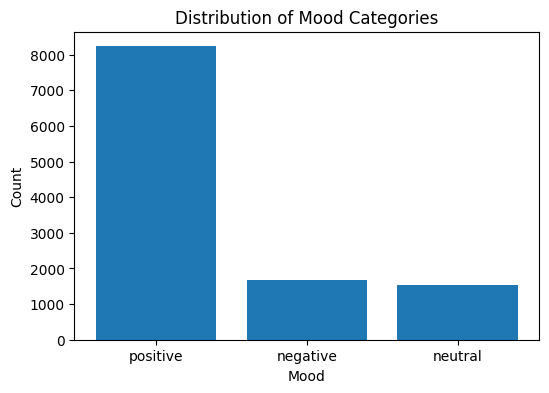

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(mood_counts.index,mood_counts.values)
plt.xlabel("Mood")
plt.ylabel("Count")
plt.title("Distribution of Mood Categories")

In [ ]:
mood_grouped = df.groupby(['topic', 'mood']).size().unstack()


Text(0.5, 1.0, 'Mood Distribution Grouped by Category')

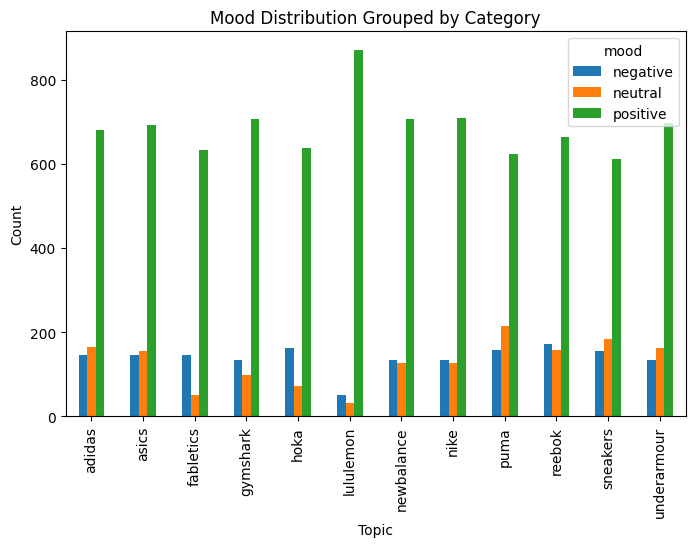

In [ ]:
mood_grouped.plot(kind='bar', figsize=(8, 5))
# Customizing the plot
plt.xlabel("Topic")
plt.ylabel("Count")
plt.title("Mood Distribution Grouped by Category")

# K-Means Clustering

In [1]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.5 MB/s eta 0:00:00


In [31]:
!pip install ace-tools-open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


In [ ]:
!pip install threadpoolctl==3.2.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0


In [ ]:
!pip install scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.0 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fairlearn 0.11.0 requires pandas>=2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 5.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fairlearn 0.11.0 requires pandas>=2.0.3, but you have pandas 1.5.3 which is incompatible.
snowflake-ml-python 1.2.1 requires scikit-learn<1.4,>=1.2.1, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snowflake-ml-python 1.2.1 requires pandas<2,>=1.0.0, but you have pandas 2.2.3 which is incompatible.
snowflake-ml-python 1.2.1 requires scikit-learn<1.4,>=1.2.1, but you have scikit-learn 1.6.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import re
import string
import emoji
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [10]:
# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
# Load dataset
df = pd.read_csv("/content/athletic_apparel.csv")  # Replace with actual dataset path

In [12]:
# Combine the text columns
df["text"] = df["Title"].astype(str) + " " + df["Body"].astype(str) + " " + df["comments"].astype(str)

In [13]:
# Function to replace emojis with words
def replace_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [14]:
# Text Preprocessing Function
def preprocess_text(text):
    text = replace_emojis(text)  # Replace emojis with words
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words("english"))  # Define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

In [15]:
# Apply preprocessing to text column
df["cleaned_text"] = df["text"].apply(preprocess_text)

In [ ]:
df[['text', 'cleaned_text']]

,text,cleaned_text
0,"For all the ""Can you ID"" post, just google the...",id post google article number start nan remind...
1,Taipei-Exclusive Bubble Tea Samba Yay or Nay? ...,taipeiexclusive bubble tea samba yay nay ’ pre...
2,gazelle indoor - burgundy 🎈 nan They look good...,gazelle indoor burgundy balloon nan look good ...
3,Team Adidas Stan smith or Campus 80s 😉 Out of ...,team adidas stan smith campus winkingface defi...
4,Concept kicks x Adidas ARUKU strung nan,concept kick x adidas aruku strung nan
...,...,...
11453,"Hey guys, I would like you to share a personal...",hey guy would like share personal project work...
11454,New Project Rock Gear I know the PR3s just dro...,new project rock gear know pr dropped yesterda...
11455,Men’s Compression Shorts/Leggings with pockets...,men ’ compression shortsleggings pocket option...
11456,What is the name of this bag? I found it on a ...,name bag found model wearing men ua unstoppabl...


In [17]:
# Convert text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["cleaned_text"])

In [19]:
# Apply K-Means Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

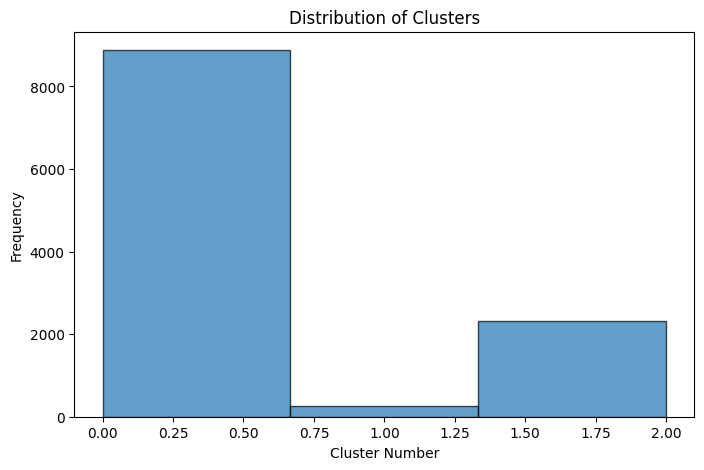

In [20]:
# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
plt.hist(df["Cluster"], bins=num_clusters, edgecolor="black", alpha=0.7)
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
plt.title("Distribution of Clusters")
plt.show()

In [21]:
# Save the clustered dataset
df.to_csv("clustered_dataset.csv", index=False)

In [33]:
# Display first few rows
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Clustered Dataset", dataframe=df[['cleaned_text', 'Cluster']])

Clustered Dataset
